# AI Security Homework 1

- Lecturer: Sangkyun Lee
### Due: April 10th (Wed) 2024, 11:59pm KST
- Answer the following questions in <span style="color:red">**English**</span>. Answers in other languages won't be accepted.
- Submit your answer as <span style="color:red">**a PDF file**</span> through blackboard (LMS)
- <span style="color:red">**Typeset**</span> your answers using equation editors (for example, in MS Word or HWP) or using LaTeX. Handwritten answers won't be accepted.
- Total 35 points
---

## Prediction Performance

Consider a classification problem where an input data X and its label Y are sampled from a (usually unknown) probability distribution, that is,

$$
  (X, Y) \sim \mathbb{P}(X,Y)
$$

Given a dataset $\{(x_i, y_i)\}_{i=1}^n$ consisting of $n$ data points sampled from $P(X,Y)$ and a classifier $h(x_i)$ that gives a prediction in the same form as $y_i$, we can think of different types of errors:

- i) Training error rate: 

$$\frac1n \sum_{i=1}^n 1_{h(x_i) \neq y_i}$$

where $1_{event}$ is an indicator function that returns 1 of the event is true and 0 otherwise.

- ii) Generation error: 

$$
 \mathbb{E}_{(X,Y)} \left[ 1_{h(X)\neq Y} \right] = \int_{x,y} 1_{h(x)\neq y} \mathbb{P}(x,y) dxdy
$$

#### 1 [4]. Explain what does the equation in i) computes.

#### 2 [5]. How does the eq in i) differ from the eq in ii) ? Explain.

#### 3 [6]. In pratical learning situation, we divide a given dataset into a train, a validation, and a test set. Explain the purpose of each dataset.

---

## Logistic Regression

The following code is designed to solve the following logistic regression problem:

$$
\min_{(w \in \mathbb R^p,b \in \mathbb R)} J(w,b) := - \frac1n \sum_{i=1}^n \Big( y^{(i)} \log \sigma(w^T x^{(i)}+b) + (1-y^{(i)}) \log (1-\sigma(w^T x^{(i)}+b)) \Big)
$$

where $p$ is the number of input features and $\sigma(z^{(i)}) = \frac{1}{1+\exp(-z^{(i)})}$.

#### 4 [10] Show the expression of $\frac{\partial J(w,b)}{\partial b}$, showing the intermediate derivations. Discuss if code fragment below (marked as #### Problem 4 ####) implementing this computation makes sense.



In [1]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()                    ########### Problem 4 ###########
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

---

## SVM

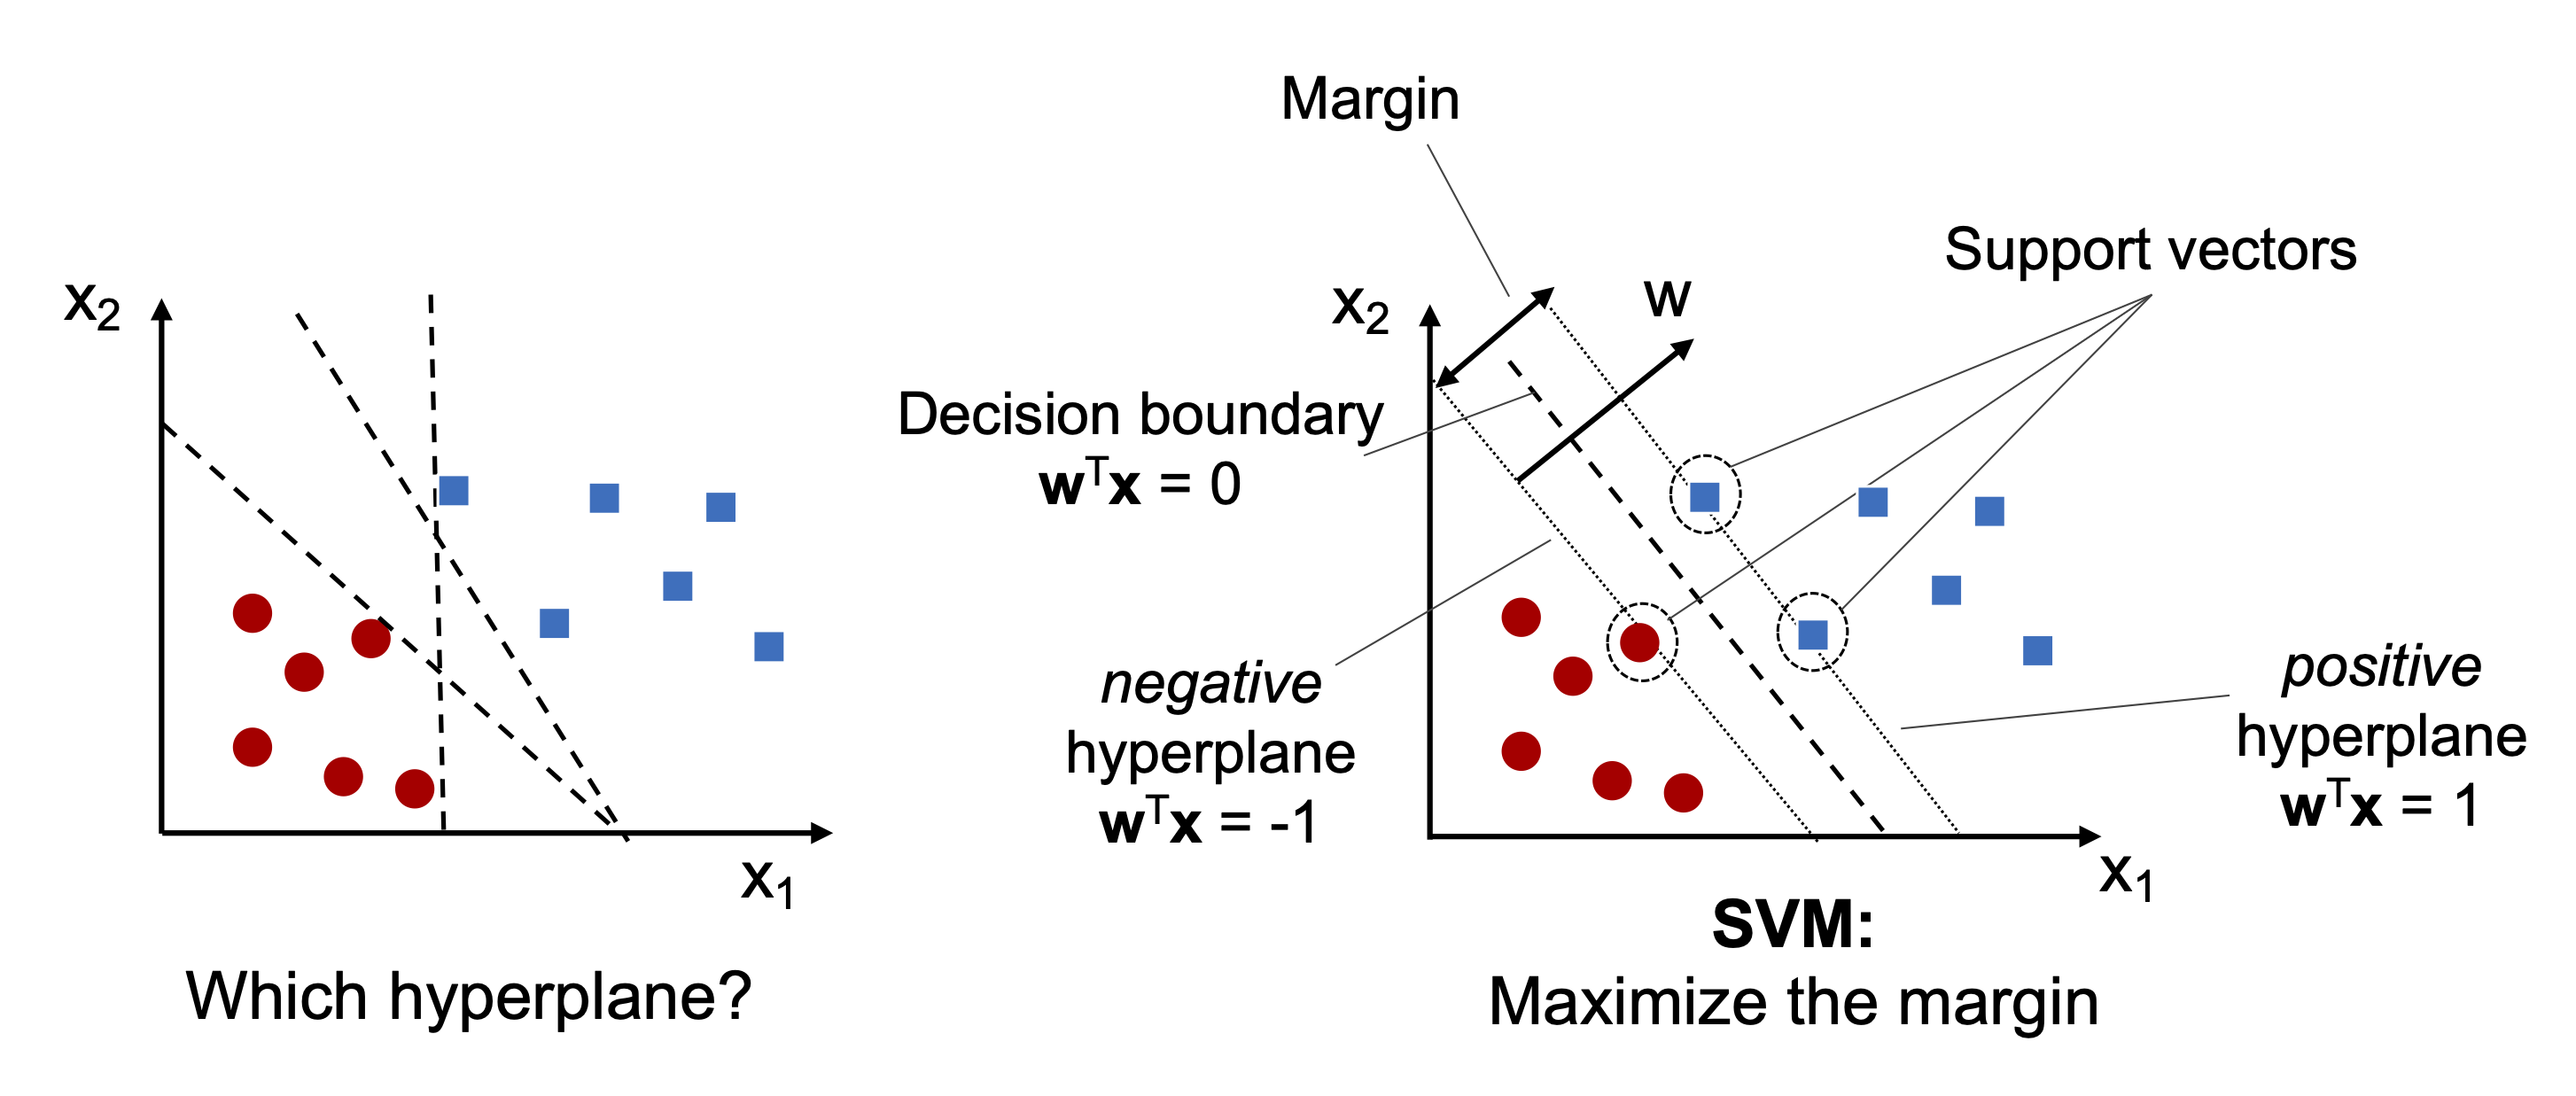

In [4]:
from IPython.display import Image
%matplotlib inline

Image(filename='../ch03/images/03_09.png', width=900) 

#### 5 [10]. Consider an SVM, consisting of three hyperplanes (ignore the expressions of hyperplanes in the figure above) :

- Decision plane: $w^Tx + b = 0$
- Two supporting planes: $w^Tx+b = +1$ and $w^Tx+b=-1$

Show that the distance between two supporting planes (called the 'margin') can be formulated as $$ \frac{2}{\|w\|_2}$$.